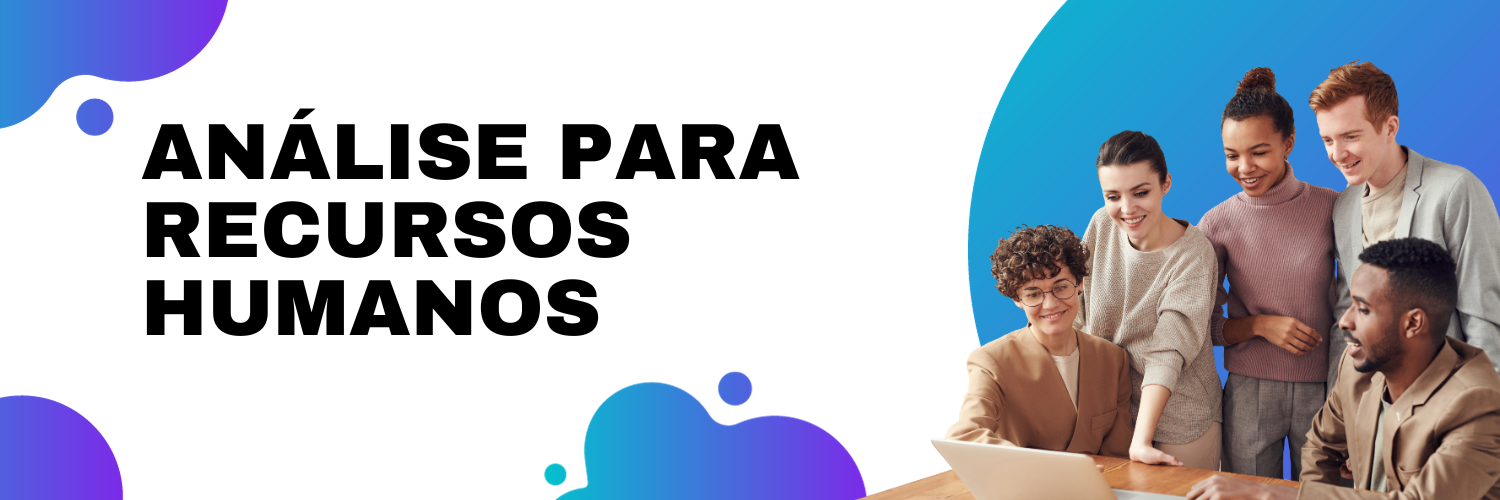

# Cenário

A GoBigData, uma consultoria fictícia especializada em Big Data e Data Science, está buscando contratar cientistas de dados entre os participantes aprovados em seus cursos. Diante do grande número de inscritos para o treinamento avançado, a empresa enfrenta o desafio de distinguir quem realmente está interessado em trabalhar para ela após o treinamento.

Nosso papel como analistas de dados é importante neste cenário. Precisamos realizar uma análise abrangente dos dados fornecidos, compreendendo sua estrutura, realizando limpeza e transformação conforme necessário, identificando padrões relevantes e fazendo diagnósticos significativos. O objetivo é oferecer à empresa insights valiosos que ajudem na seleção dos profissionais adequados.

Além disso, nossa análise será essencial para melhorar a qualidade do treinamento, planejamento dos cursos e categorização dos candidatos, visando reduzir custos e tempo de contratação.

Neste projeto, conduziremos uma análise dos dados de Recursos Humanos (RH), envolvendo análises descritivas, diagnósticas e estatísticas. Ao final, apresentaremos um parecer informativo, destacando os principais pontos descobertos durante nossa análise.

# Dados

## Conjunto de Dados

O conjunto de dados foi disponibilizado em 2020 na comunidade do Kaggle. Ele foi compartilhado por Möbius.

Você pode acessar o conjunto de dados "HR Analytics: Job Change of Data Scientists" [aqui](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists/data).

## Acessibilidade e privacidade dos dados

Na seção [Data Card](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists) é informado que o conjunto de dados utiliza a licença **CC0: Public Domain**.

A [licença CC0](https://creativecommons.org/publicdomain/zero/1.0/deed.pt_BR) permite a renúncia de todos os direitos sobre uma obra, possibilitando que outros construam, melhorem e reutilizem o trabalho para qualquer finalidade, sem restrições legais de direitos autorais. Em outras palavras, você pode copiar, modificar e distribuir o trabalho, até mesmo para fins comerciais, sem a necessidade de obter autorização.

## Informações sobre o conjunto de dados

Os dados abrangem informações demográficas e outros detalhes dos participantes dos treinamentos oferecidos por uma empresa de Data Science. Inclui variáveis como: gênero, experiência relevante, nível educacional, experiência profissional, horas de treinamento e outras.

O conjunto de dados consiste em 19.158 registros e 14 variáveis.

## Dicionário das variáveis

* **enrollee_id**: identificador único do candidato
* **city**: Código da cidade
* **city_development_index**: Índice de desenvolvimento da cidade
* **gender**: Gênero do candidato
* **relevent_experience**: Experiência relevante do candidato
* **enrolled_university**: Tipo de curso universitário em que está matriculado, se houver
* **education_level**: Nível educacional do candidato
* **major_discipline**: Área de estudo do candidato
* **experience**: Experiência total do candidato em anos
* **company_size**: Número de funcionários na empresa atual do empregador
* **company_type**: Tipo da empresa do empregador atual
* **last_new_job**: Diferença em anos entre o emprego anterior e o emprego atual
* **training_hours**: Horas de treinamento concluídas
* **target**: variável alvo, onde 0 equivale a 'Não busca mudança de emprego' e 1 a 'Busca mudança de emprego'


## Instalando e Carregando os Pacotes

In [1]:
from platform import python_version
print('Versão da Linguagem Python:', python_version())

Versão da Linguagem Python: 3.10.12


In [2]:
# Para criar mapa de valores ausentes
!pip install -q missingno

In [ ]:
# Para aplicar categorização às variáveis
!pip install -q category_encoders

In [4]:
# Para criação de gráficos de alto nível
!pip install -q plotly

In [5]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Carregando os Dados

In [6]:
# Carregando o dataset
df = pd.read_csv("aug_train.csv")

In [7]:
num_linhas = df.shape[0]
num_colunas = df.shape[1]

print(f"O conjunto de dados contém {num_linhas} linhas e {num_colunas} colunas.")

O conjunto de dados contém 19158 linhas e 14 colunas.


In [8]:
# Nome das colunas
df.columns.tolist()

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [9]:
# Amostra dos dados
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [10]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória de Dados

In [14]:
# Descrevendo os dados não numéricos
df.describe(include = object).T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [12]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


>O City Development Index (CDI) é uma métrica que avalia o desenvolvimento de uma cidade com base em várias dimensões. Essa métrica é usada para medir o progresso e a qualidade de vida em áreas urbanas. Os valores do CDI podem variar em uma escala de 0 a 1, onde 0 representa o desenvolvimento mínimo ou nenhum desenvolvimento, e 1 representa o desenvolvimento máximo.

Vamos avaliar as variáveis **city_development_index** e **training_hours**.

Em **city_development_index**:

* média de 0,828
* mediana de  0,903
* desvio-padrão de 0,123

A maioria dos candidatos é de cidades bem desenvolvidas.


Em **training_hours**:

* média de 65,367
* mediana de 47
* valor máximo de 336

Temos mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

### Variáveis Categóricas

In [15]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

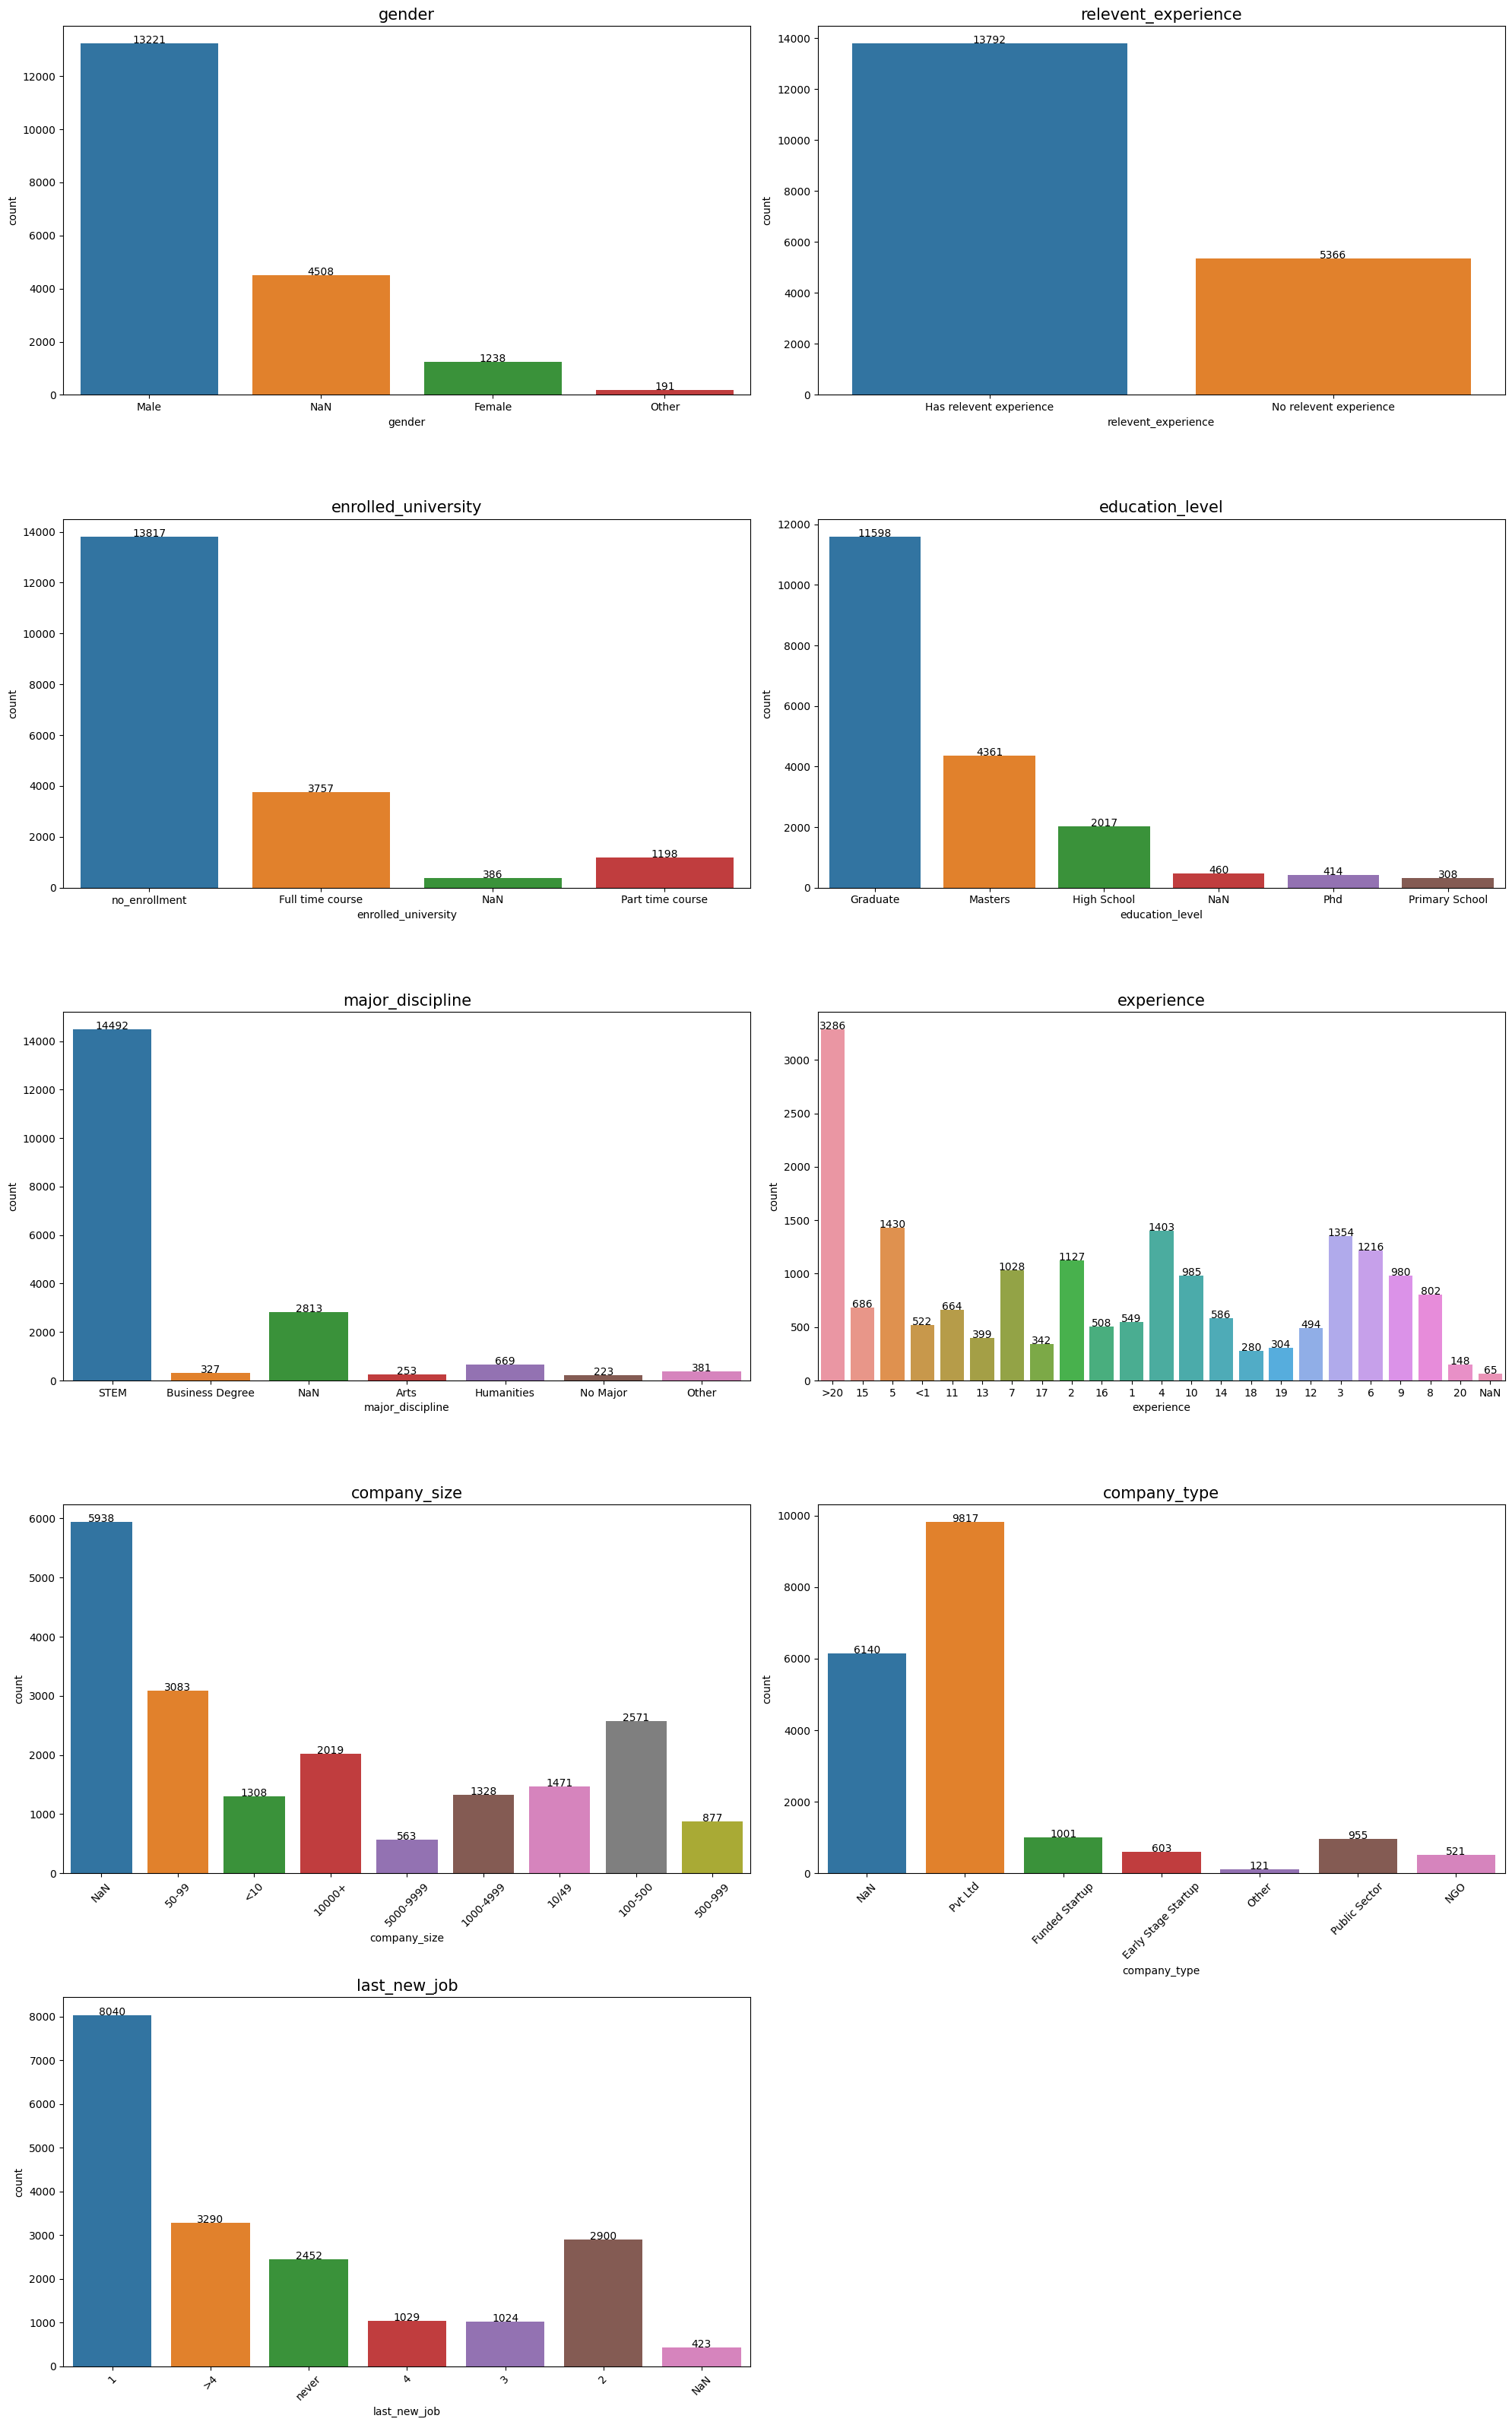

In [22]:
# Plot
plt.figure(figsize=(20, 32))

# Lista das colunas categóricas
column_list = list(df.columns.values)[3:12]

A = 0
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data=df.fillna('NaN'), x=i)
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{int(p.get_height())}', (p.get_x() + 0.4, p.get_height()), ha='center', color='black')
    if A >= 7:
        plt.xticks(rotation=45)

# Layout
plt.tight_layout(h_pad=2)
plt.show()

Avaliando os gráficos da variáveis categóricas temos:

* Predominância do sexo masculino entre os candidatos.
* A maioria possui experiência relevante. É razoável assumir que pessoas buscando treinamento avançado tenham alguma experiência prévia.
* A maioria não está atualmente matriculada em cursos de graduação, sugerindo que já tenham concluído a graduação e estão em busca de especializações.
* Observa-se que a maior parte dos candidatos possui nível educacional correspondente a graduação completa.
* A área de estudo mais comum entre os candidatos é STEM, abrangendo cursos nas áreas de exatas e tecnologia.
* A experiência profissional é um ponto forte do grupo, já que a maioria possui mais de vinte anos de experiência.
* Quanto ao tamanho das empresas em que trabalham, a maioria dos candidatos está empregada em empresas com uma equipe de 50 a 99 funcionários.
* Por fim, é importante destacar que os profissionais geralmente têm períodos curtos de desemprego.


### Distribuição das Variáveis Numéricas

In [23]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


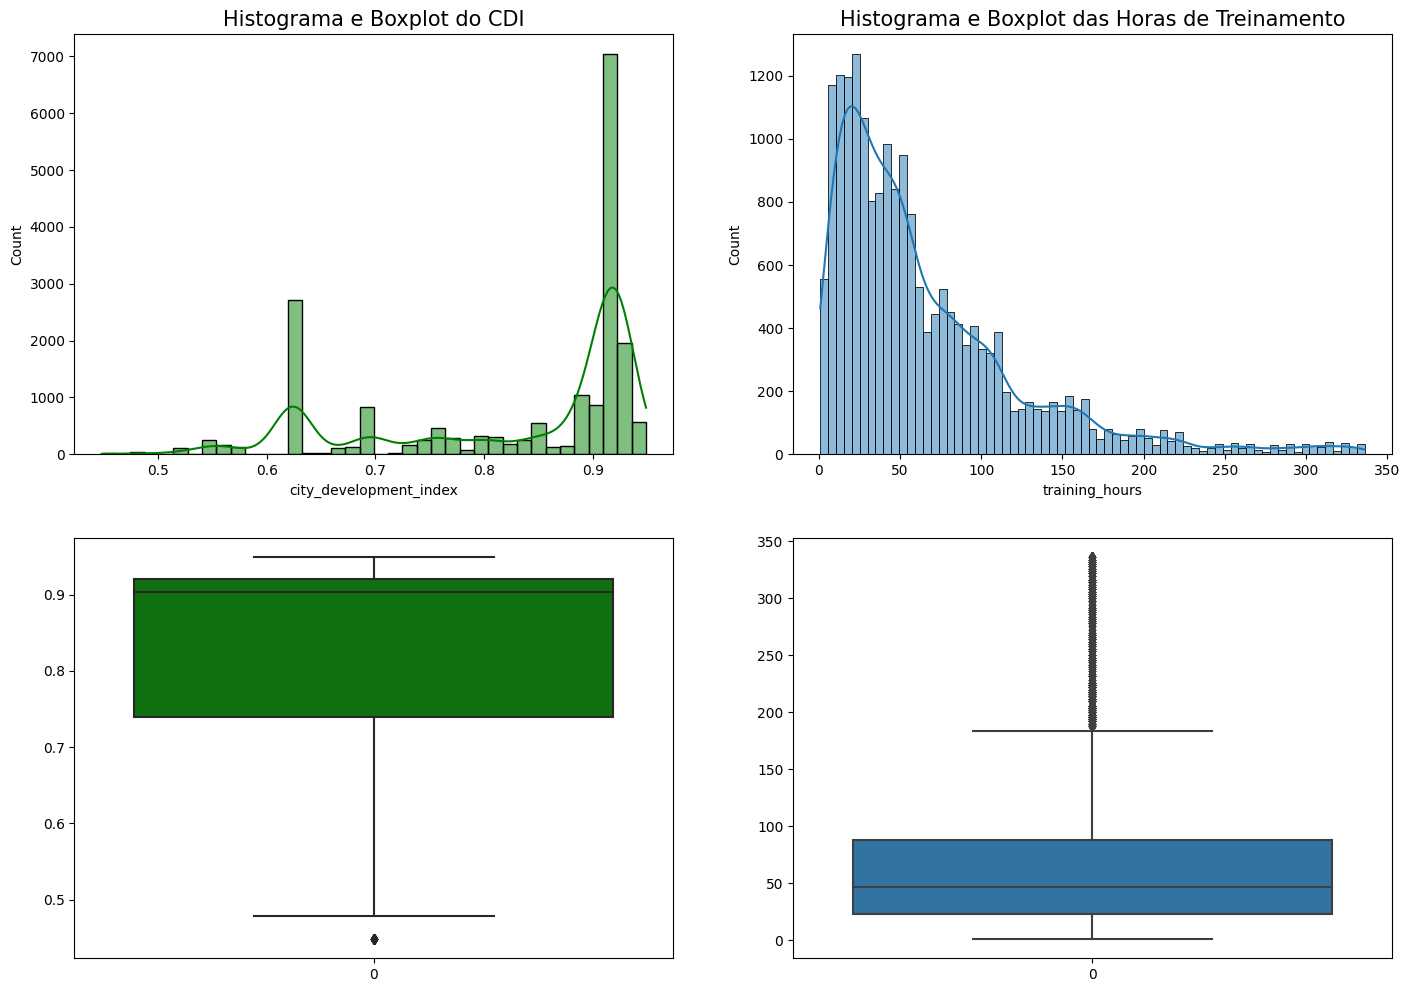

In [27]:
# Plot
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color ='green') # kde = curva de densidade
plt.title('Histograma e Boxplot do CDI', fontsize = 15)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True)
plt.title('Histograma e Boxplot das Horas de Treinamento', fontsize = 15)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color ='green')

plt.subplot(224)
sns.boxplot(df['training_hours'])

plt.show()

* As duas variáveis não seguem uma distribuição normal.
* Os boxplots são inversos. A maioria dos registros de CDI está abaixo da mediana. A maioria dos registros de horas de treinamentos está acima da mediana. Temos outliers em ambas variáveis.

Vamos validar a distribuição com o teste de normalidade.

In [28]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['city_development_index', 'training_hours']

for i in numerical_feature:

    # Calcula a normalidade
    stats, pval = normaltest(df[i])

    # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


* As variáveis **city_development_index** e **training_hours** não apresentam uma distribuição normal. Para a análise numérica, o método não paramétrico é o mais adequado.

* Quanto aos dados de **training_hours**, observamos uma concentração principalmente no lado esquerdo do histograma. Esse padrão é esperado, uma vez que as pessoas costumam iniciar os treinamentos com entusiasmo, mas nem todos que começam conseguem concluir a jornada.

### Correlação dos Dados

#### Correlação de Spearman Entre Variáveis Numéricas

Analisamos a correlação entre as variáveis numéricas e entre as variáveis numéricas e a variável alvo (o que estamos querendo analisar).

In [32]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [33]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [34]:
# Criando uma cópia do dataframe original
df_numerical = df.copy()

In [35]:
# contando quantos elementos únicos tem a variável experience
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [36]:
# Convertendo a variável experience para numérica
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [37]:
df_numerical["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [38]:
df_numerical["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [39]:
# Convertendo a variável last_new_job para numérica
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)

In [40]:
df_numerical["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [42]:
df_numerical.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0


In [43]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [44]:
# calculando o coeficiente de correlação
# o .corr já não considera as variáveis categoricas
df_numerical.drop("enrollee_id", axis = 1).corr("spearman")

<ipython-input-44-720628b6ce1a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_numerical.drop("enrollee_id", axis = 1).corr("spearman")


,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


<ipython-input-49-8f72055d4a31>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")


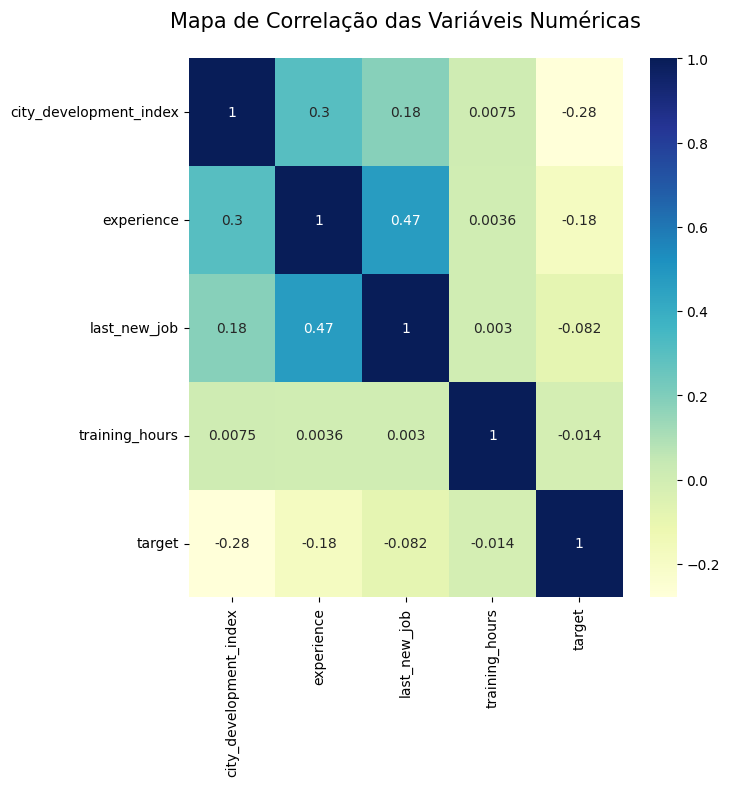

In [49]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

Conclusões do Mapa de Correlação:

* O índice de desenvolvimento da cidade (city_development_index) tem uma correlação moderada (0.30) com a experiência, indicando que em cidades mais desenvolvidas, os candidatos tendem a ter mais experiência.

* A experiência (experience) também está moderadamente correlacionada (0.47) com o tempo desde o último emprego (last_new_job), sugerindo que candidatos com mais experiência tendem a permanecer em empregos por mais tempo.

* A variável alvo (target) tem correlações negativas fracas com as outras variáveis, sendo mais notável com o índice de desenvolvimento da cidade (city_development_index) com uma correlação de -0.28. Isso indica que em cidades mais desenvolvidas, os candidatos estão menos propensos a buscar ativamente um novo emprego.

* As horas de treinamento (training_hours) têm correlação muito fraca com as outras variáveis, indicando uma relação praticamente nula. No entanto, essa correlação pode não considerar relações não-lineares.

Lembrando que correlação não implica causalidade direta, e outras influências podem afetar essas relações.

### Weight of Evidence (WOE) e Information Value (IV)

Este conjunto de dados contém mais dados com tipo categórico do que numérico. Usaremos recursos categóricos nominais para WOE e IV. Isso pode ajudar a identificar a importância preditiva das variáveis em relação à variável alvo.

O "Weight of Evidence" (WOE) e o "Information Value" (IV) são medidas usadas para avaliar o poder discriminatório das variáveis em modelos estatísticos. O WOE mede a relação entre uma variável independente e um evento, com valores mais altos indicando uma relação mais forte. O IV resume o poder discriminatório de uma variável, sendo maior quando a variável é mais informativa para prever um evento binário.

Interpretamos o resultado de IV assim:

    Information Value, Poder de Previsão
    
    < 0.02, não deve ser usado para previsão
    0.02 - 0.1, preditor fraco
    0.1 - 0.3, preditor médio
    0.3 - 0.5, preditor forte
    > 0.5, parece bom demais para ser verdade

In [50]:
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:

    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))

    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

Fizemos o drop/remoção das seguintes variáveis:
* numéricas;
* target - alvo;
* enrollee_id - é um identificador;
* city - corresponde a um código e não agrega informação;
* company_size - não é relevante para a análise.

```
df_woe_iv = (pd.crosstab(df[i], df['target'], normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
```

Essas linhas calculam as estatísticas WOE (Weight of Evidence) e IV (Information Value) para a coluna atual do loop.

- pd.crosstab(df[i], df['target'], normalize='columns') cria uma tabela de contingência cruzada entre a coluna atual (df[i]) e a coluna 'target', normalizando as frequências por colunas. Essa tabela mostra a distribuição das classes de 'target' em relação aos valores únicos da coluna atual.

- .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0])) adiciona uma nova coluna chamada 'woe' à tabela de contingência cruzada. A função lambda calcula o WOE para cada valor da coluna atual, que é o logaritmo da razão das frequências da classe positiva (1) pela classe negativa (0). O WOE é uma medida usada em análises de crédito para avaliar o poder preditivo de uma variável em relação à variável alvo.

- .assign(iv=lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))) adiciona outra coluna chamada 'iv' à tabela de contingência cruzada. A função lambda calcula o IV para a coluna atual somando o produto do WOE pelo diferencial das frequências da classe positiva e negativa. O IV é uma medida de informação que quantifica a importância preditiva de uma variável em relação à variável alvo. Valores mais altos de IV indicam uma relação mais forte entre a variável e o alvo.



<Figure size 1000x1200 with 0 Axes>

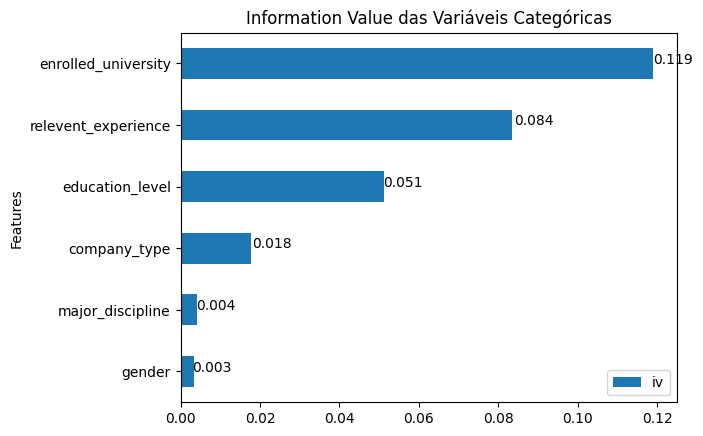

In [69]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas')

for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))

plt.show()

O gráfico nos mostra a ordenação dos recursos com base em sua capacidade preditiva em relação à variável alvo.

Considerando o Índice de Informação (IV), podemos afirmar que **enrolled_university** é um preditor de média importância, enquanto **relevent_experience** e **education_level** são preditores fracos. Os demais apresentam baixa utilidade para a previsão.

>Explicando o trecho de código:

```
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
    iv.append(df_woe_iv['iv'][0])
```
Nesse loop for, percorremos cada coluna categórica na lista columns_cat. Para cada coluna, realizamos as seguintes operações:

Criamos uma tabela de contingência cruzada entre a coluna atual (df[i]) e a coluna 'target', normalizando as frequências por colunas.

Adicionamos uma coluna chamada 'woe' à tabela de contingência cruzada, que calcula o WOE (Weight of Evidence) para cada valor da coluna atual.

Adicionamos outra coluna chamada 'iv' à tabela de contingência cruzada, que calcula o IV (Information Value) para a coluna atual.

Adicionamos o valor do IV calculado na primeira linha (primeiro valor) da coluna 'iv' à lista iv.

```
df_iv = pd.DataFrame({'Features': columns_cat, 'iv': iv}).set_index('Features').sort_values(by='iv')
```
Nessa linha, criamos um novo dataframe chamado df_iv que contém as colunas categóricas (columns_cat) e os valores correspondentes de IV (iv). Definimos a coluna 'Features' como o índice do dataframe e ordenamos os valores pelo IV em ordem crescente.

```
plt.figure(figsize=(10, 12))
df_iv.plot(kind='barh', title='Information Value das Variáveis Categóricas', colormap="Accent")
for index, value in enumerate(list(round(df_iv["iv"], 3))):
    plt.text(value, index, str(value))
plt.legend(loc="lower right")
plt.show()
```
Nessas linhas finais, criamos um gráfico de barras horizontais (barh) usando o dataframe df_iv. Configuramos o título do gráfico como "Information Value das Variáveis Categóricas" e o colormap para "Accent" (uma paleta de cores). Em seguida, adicionamos os valores de IV em cada barra do gráfico usando a função plt.text. Por fim, exibimos o gráfico na tela.

### Identificando Valores Ausentes

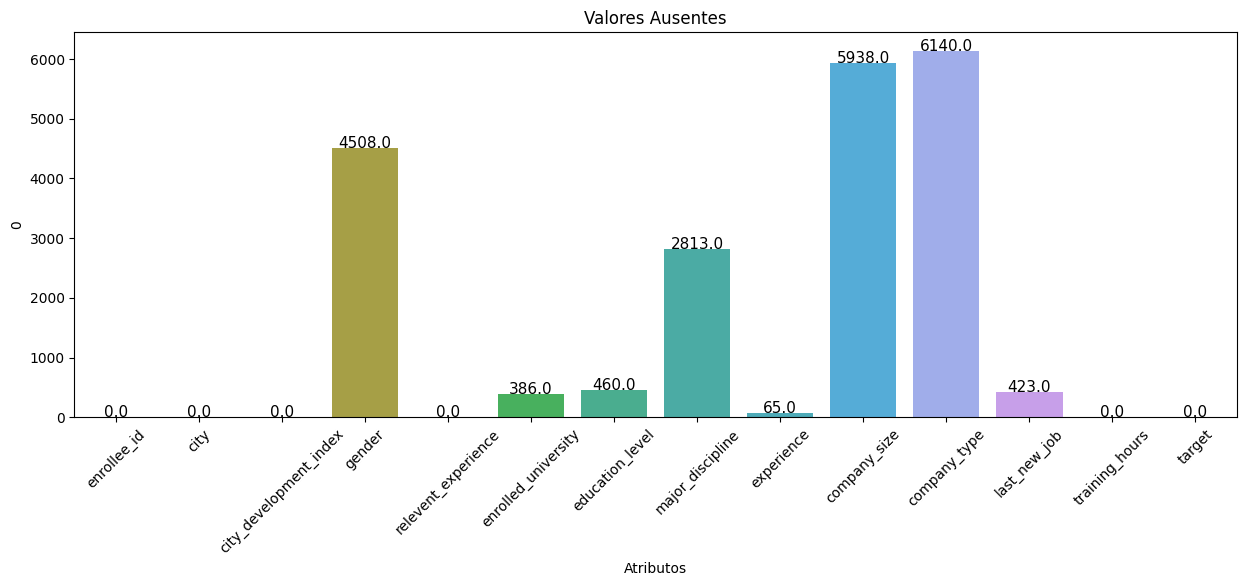

In [78]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

# Figura
plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(data = null_df, x= 'index', y = 0)
plt.xlabel('Atributos')
plt.xticks(rotation = 45)
plt.title("Valores Ausentes")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

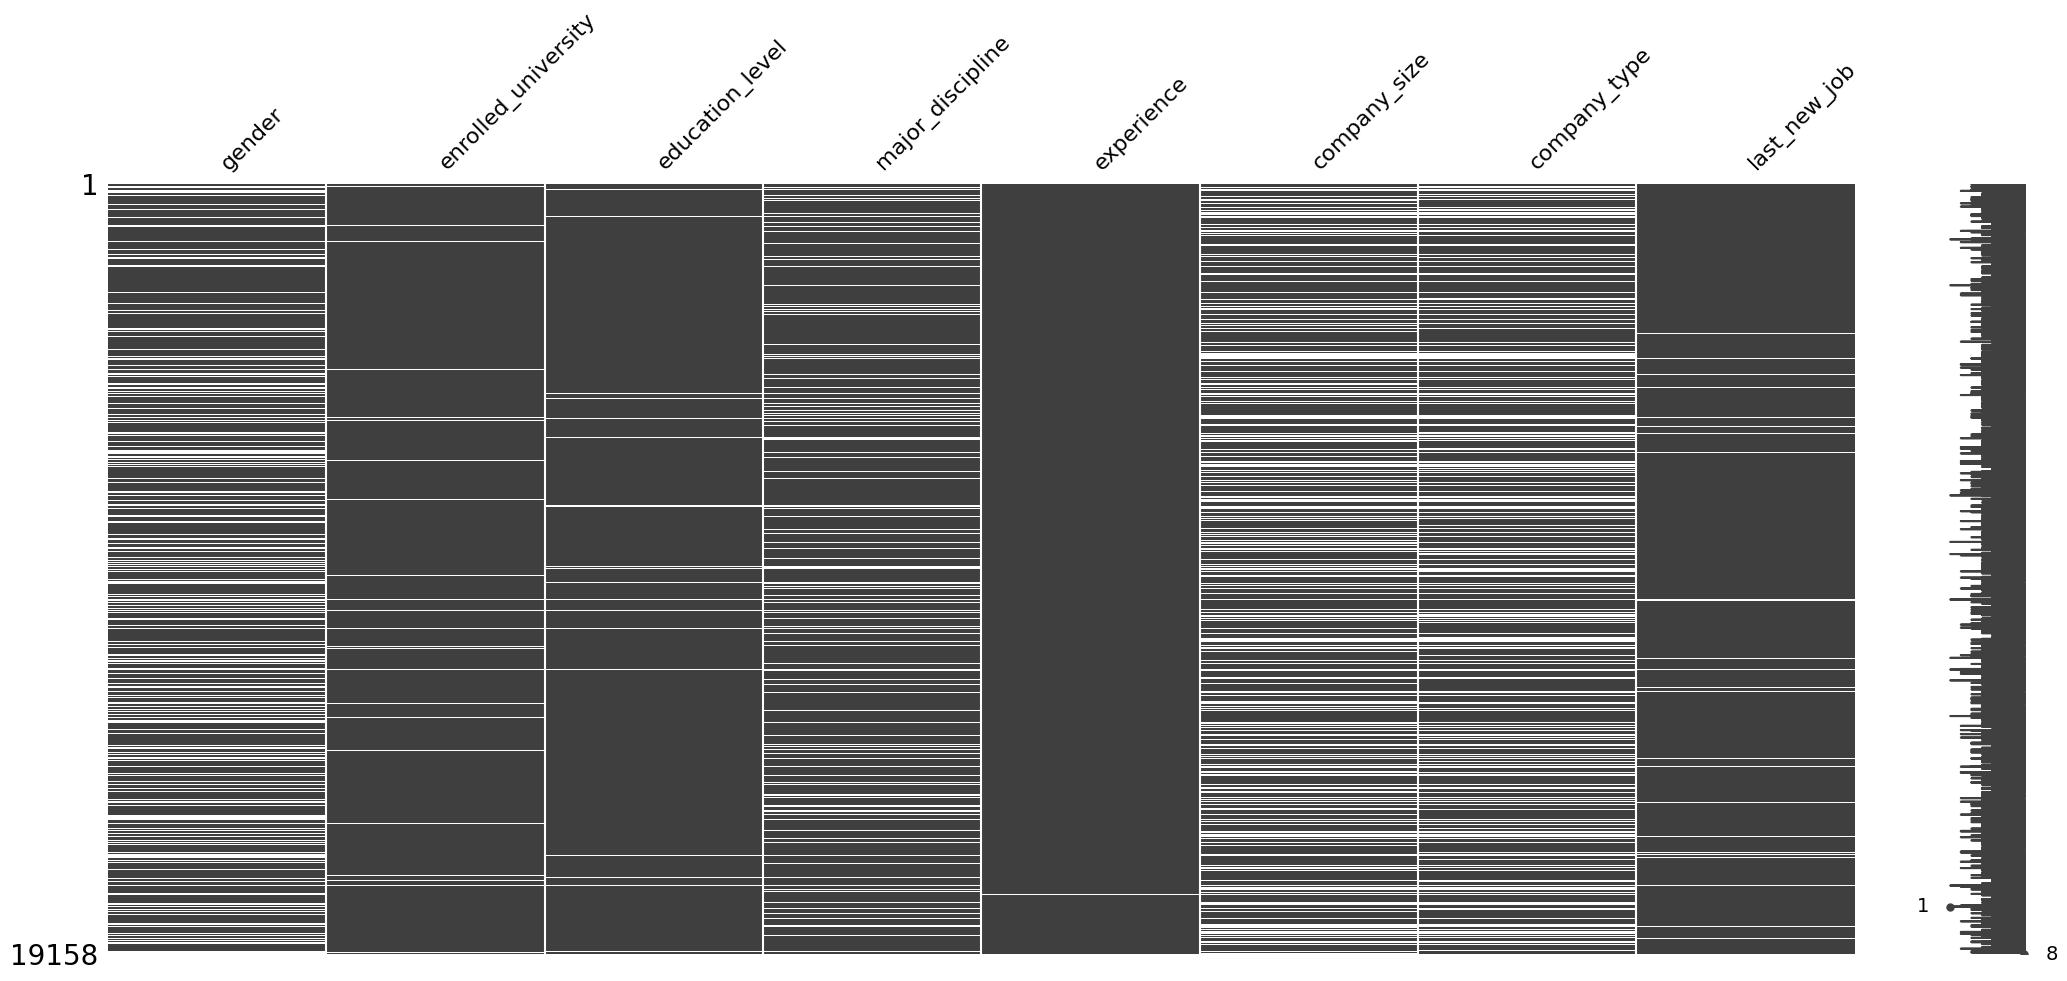

In [79]:
# Mapa de Valores Ausentes
df_nan = pd.DataFrame(df.isna().sum())

if df.isna().any(axis = None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Conseguimos observar que os valores ausentes em cada coluna têm um padrão aleatório.

### Identificando Valores Duplicados

In [80]:
# Verificando valores duplicados
duplicados = df['enrollee_id'].duplicated().sum()
print(f"O dataframe tem {duplicados} valores duplicados.")

O dataframe tem 0 valores duplicados.


### Identificando Dados Desbalanceados

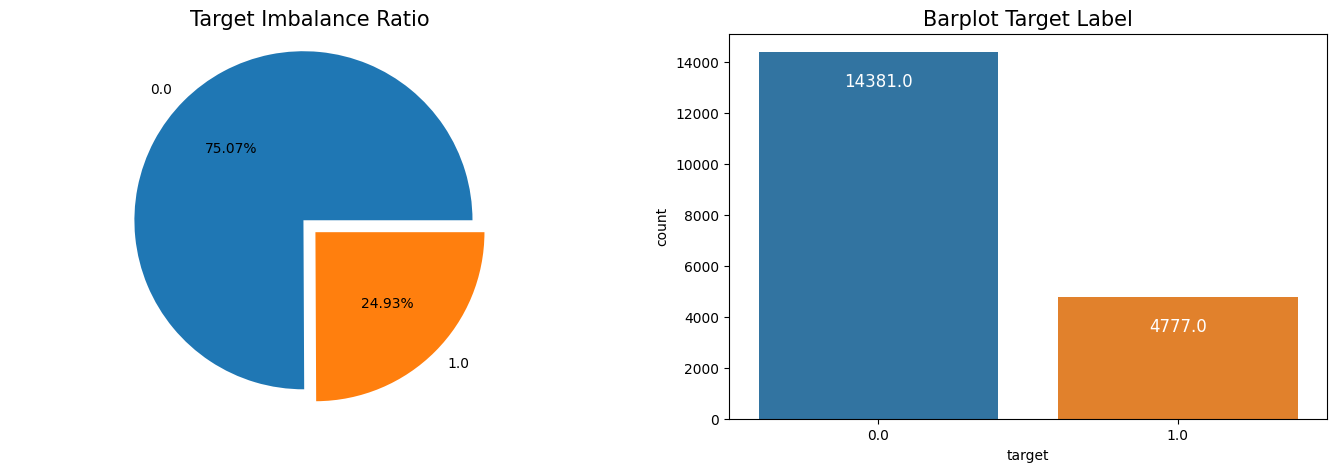

In [81]:
# Figura
plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.4,
                 p.get_height()),
                ha = 'center',
                va = 'top',
                color = 'white',
                size = 12)

Os dados estão desbalanceados em relação à variável target.

### Tratando os Valores Ausentes

In [82]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [83]:
# variáveis que consideramos importantes
colunas_manter = ['city_development_index',
                  'experience',
                  'enrolled_university',
                  'relevent_experience',
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [84]:
new_df = df[colunas_manter]

In [85]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [86]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


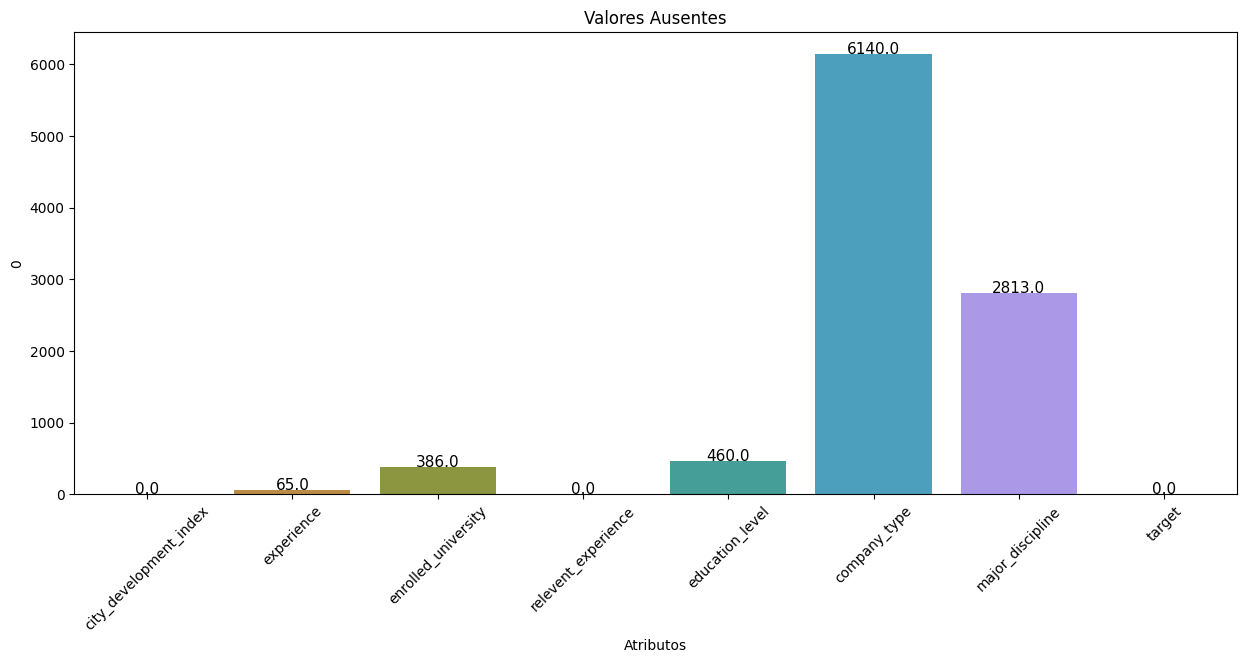

In [89]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(data = null_df, x = 'index', y = 0, palette = 'husl')
plt.xlabel('Atributos')
plt.xticks(rotation = 45)
plt.title("Valores Ausentes")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

Vamos tratar os valores ausentes de cada variável.

#### Variável major_discipline

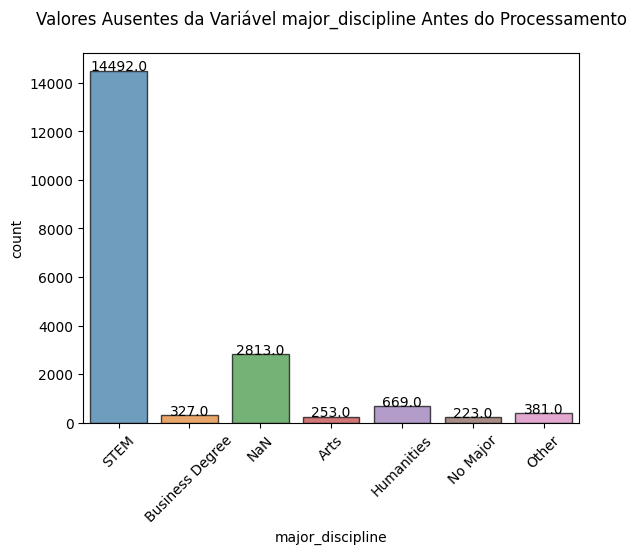

In [91]:
# Valores Ausentes da Variável major_discipline Antes do Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black')
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento\n")
plt.show()

Nas linhas onde temos valores ausentes de *major_discipline*, como está a proporção em *education_level*?

In [92]:
# Relação entre major_discipline x education_level
print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Preencheremos os valores NA da variável *major_discipline* com **Non Degree**, onde tivermos High School e Primary School em *education_level*.

In [93]:
# Criando o índice
nan_index = (new_df[(new_df['major_discipline'].isna()) &
 ((new_df['education_level']=='High School') |
  (new_df['education_level'].isna()) |
  (new_df['education_level']=='Primary School'))]).index


In [94]:
len(nan_index)

2785

In [ ]:
# Imputação do valor ausente
new_df['major_discipline'][nan_index] = 'Non Degree'

In [96]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

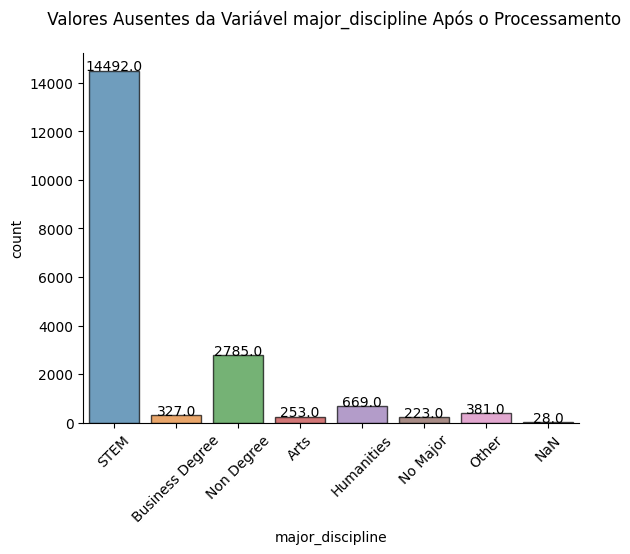

In [97]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black')
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n")
plt.show()

In [ ]:
# Para os valores ausentes restantes preenchemos com 'Other'
new_df[new_df['major_discipline'].isna()]  = 'Other'

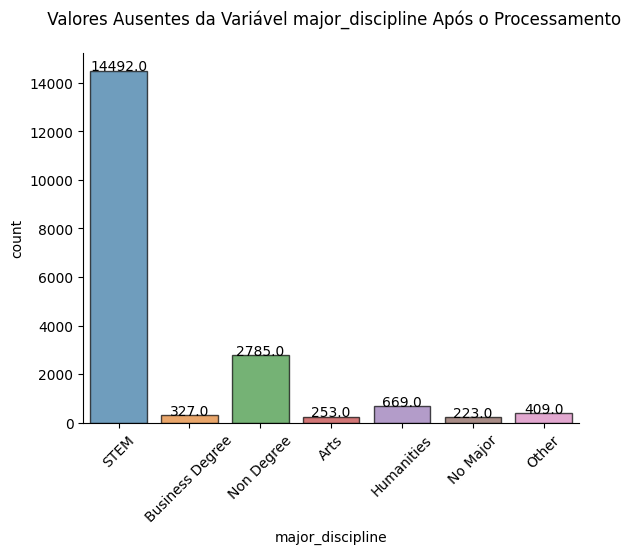

In [100]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black')
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n")
plt.show()

In [101]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável enrolled_university

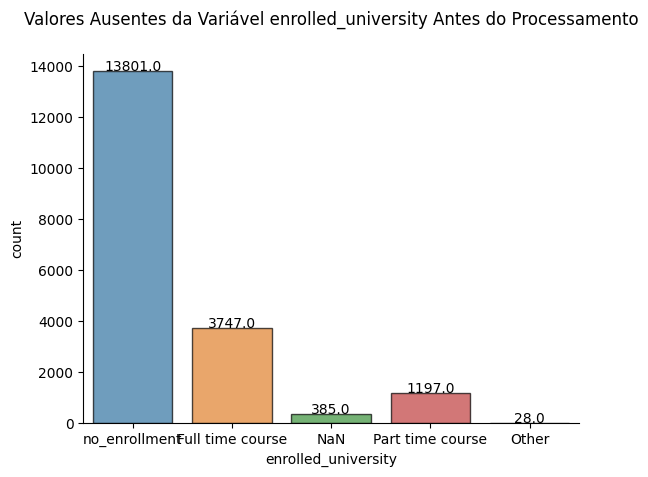

In [102]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black')
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n")
plt.show()

In [103]:
print('\nTotal de Valores Ausentes na Variável enrolled_university:', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável enrolled_university: 385

Proporção de Valores Ausentes na Variável education_level:


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Candidatos com **Primary School** como **education_level** não estão qualificados para ingressar na universidade. Portanto, preencheremos valores **NaN** em **education_level** para **Primary Grad**.

In [104]:
# Preparando o índice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [105]:
len(nan_index)

9

In [ ]:
# Imputação de valores ausentes
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [107]:
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes: 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [108]:
# Preparando o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [ ]:
# No restante colocamos como 'Other'
new_df['enrolled_university'][nan_index] = 'Other'

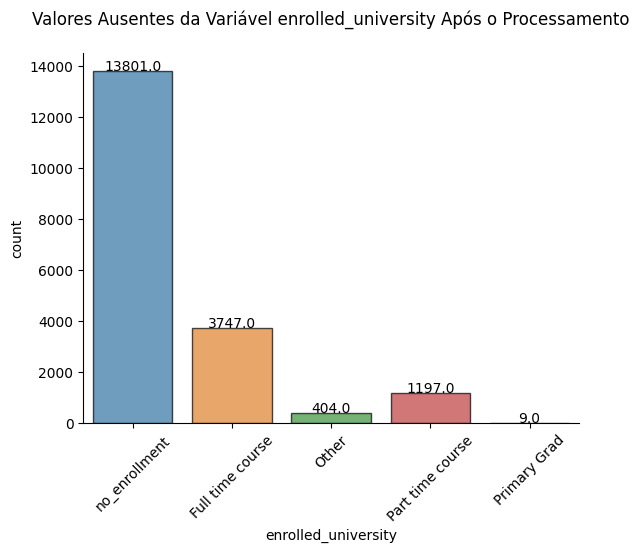

In [113]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black')
plt.title("Valores Ausentes da Variável enrolled_university Após o Processamento\n")
plt.xticks(rotation = 45)
plt.show()

In [111]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável company_type

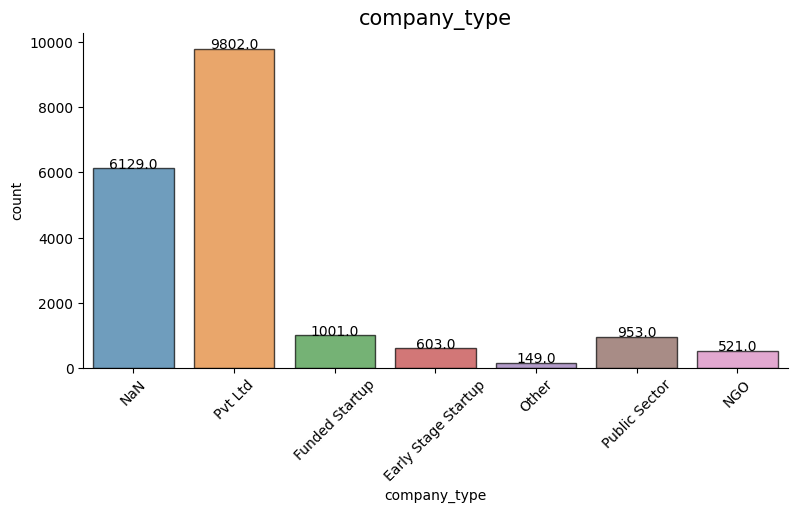

In [112]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine()
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black')
    if A >=0:
        plt.xticks(rotation = 45)

In [114]:
new_df['company_type'].value_counts(dropna = False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

In [115]:
# Índice
nan_index = new_df[(new_df['company_type'].isna())].index

In [ ]:
# Imputação dos valores NaN com 'Other'
new_df['company_type'][nan_index] = 'Other'

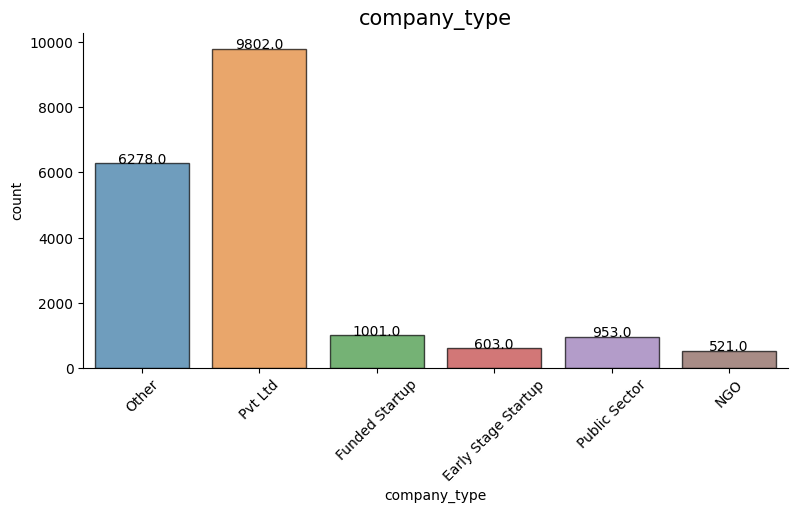

In [117]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine()
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black')
    if A >=0:
        plt.xticks(rotation = 45)

In [118]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável education_level

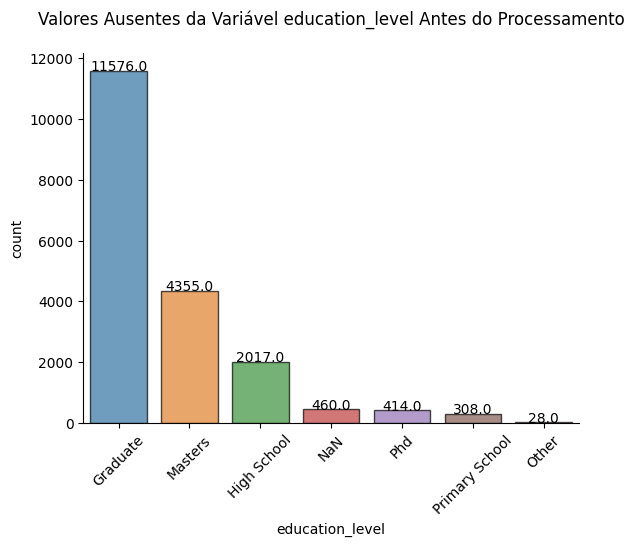

In [120]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black')
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n")
plt.xticks(rotation = 45)
plt.show()

In [121]:
# Índice
nan_index = new_df[(new_df['education_level'].isna())].index

In [ ]:
# Imputação dos valores NaN com 'Other'
new_df['education_level'][nan_index] = 'Other'

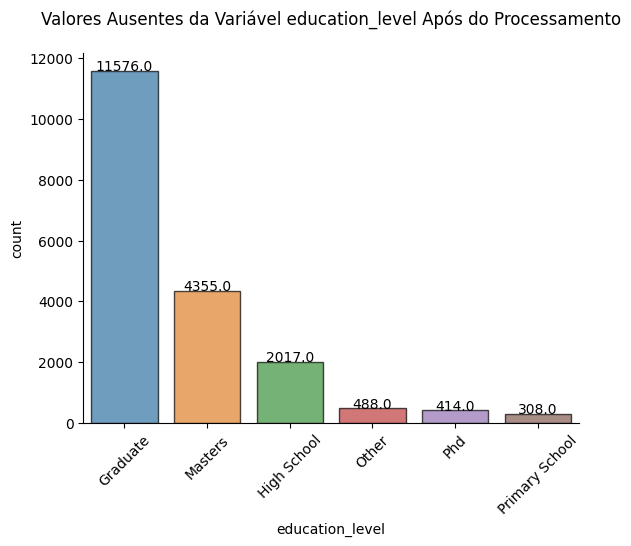

In [123]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black')
plt.title("Valores Ausentes da Variável education_level Após do Processamento\n")
plt.xticks(rotation = 45)
plt.show()

In [124]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável experience

In [125]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   experience              19095 non-null  object
 2   enrolled_university     19158 non-null  object
 3   relevent_experience     19158 non-null  object
 4   education_level         19158 non-null  object
 5   company_type            19158 non-null  object
 6   major_discipline        19158 non-null  object
 7   target                  19158 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [126]:
new_df['experience'].value_counts(dropna = False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [127]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

Temos 0.32% de valores ausentes na variável **experience**, então talvez não vale a pena continuar com ela como categórica e deletamos os NaN.

In [128]:
new_df['experience'].isnull().sum()

63

In [129]:
new_df.shape

(19158, 8)

In [130]:
new_df = new_df.dropna()

In [131]:
new_df.shape

(19095, 8)

In [132]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

### Ajustes Finais

In [136]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [137]:
# Ajustando os dados
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [138]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [140]:
new_df.to_csv('dataset_modificado.csv', index=False)

## Relatório Final

Com base em nossa análise, identificamos as variáveis mais relevantes para a identificação de um candidato promissor:

* Índice de Desenvolvimento da cidade de residência do candidato.
* Tempo de experiência profissional.
* Participação em cursos universitários.
* Experiência relevante na área.
* Nível educacional.
* Tipo de empresa que o candidato trabalhou ou trabalha.
* Área de estudo na graduação (quando aplicável).

Por outro lado, as seguintes variáveis não demonstraram relevância significativa para nossa análise:

* Identificação única do candidato.
* Código da cidade de residência do candidato.
* Gênero.
* Tempo decorrido desde o último emprego.
* Tamanho da empresa (quando aplicável).
* Total de horas de treinamento.

Recomendações:

Recomendamos que o departamento de Recursos Humanos (RH) implemente um método de coleta de dados que permita a aquisição de informações adicionais, aprimorando, assim, a qualidade dos dados e a precisão da análise.

O RH pode focar na busca por candidatos que provenham de cidades com baixo Índice de Desenvolvimento, que não possuam experiência relevante, que tenham alcançado níveis de educação mais elevados e que tenham menos tempo de experiência profissional, aumentando assim as chances de encontrar candidatos ativamente procurando emprego.

Considerando que muitas pessoas completam o treinamento em um curto período, o RH pode otimizar a duração do treinamento, tornando-o mais eficiente e condizente com as necessidades dos candidatos.

Esperamos que estas recomendações sejam úteis para aprimorar o processo de seleção e treinamento de candidatos.